Populating the interactive namespace from numpy and matplotlib
True
True


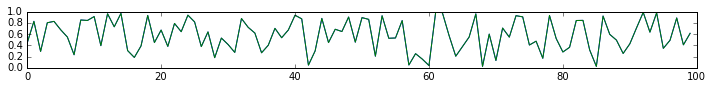

In [116]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from numba import jit
%pylab inline

def avo_IG_numpy(refls, angles, outI, outG, qual):
    sangs = np.square(np.sin(angles/180*pi))
    res = np.linalg.lstsq(np.c_[sangs,np.ones_like(sangs)], refls)
    outI[...] = res[0][1]
    outG[...] = res[0][0]
    qual[...] = res[1]
    
angs = np.array([13,22,28,33])
ns = 100
avo_I = np.random.rand(ns)
avo_G = np.random.rand(ns)
refl = np.outer(sinsq_angs, avo_G) + avo_I + np.random.normal(size=(nangs,ns), scale=1e-10)
near = refl[0,:]
mid = refl[1,:]
far = refl[2,:]
ufar = refl[3,:]

G=np.zeros(ns)
I=np.zeros(ns)
Q=np.zeros(ns)

avo_IG_numpy( refl, angs, I, G, Q)

print(np.allclose(G,avo_G))
print(np.allclose(I,avo_I))

fig = plt.figure(figsize=(12,1))
plt.plot(G)
plt.plot(avo_G)


True
True
[ 0.05060298  0.1403301   0.22040355  0.29663168]
[ 0.84019139  0.92184027  0.99470461  1.06406983]


LinregressResult(slope=0.90996878993238695, intercept=0.79414425649813292, rvalue=0.99999999999999989, pvalue=1.1103230246251568e-16, stderr=9.5880791847304676e-09)

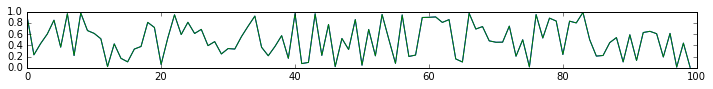

In [91]:
import scipy.stats as stats

def avo_IG(refls, angles, avo_I, avo_G, qual):
    ns = refls.shape[1]
    na = angles.shape[0]
    sangs = np.square(np.sin(angles/180*pi))
    for i in range(ns):
        avo_G[i], avo_I[i], q, p, err = stats.linregress(sangs, refls[:,i])
        qual[i] = q*q
    
        
G=np.zeros(ns)
I=np.zeros(ns)
Q=np.zeros(ns)
avo_IG(refl, angs,I,G,Q)
print(np.allclose(G,avo_G))
print(np.allclose(I,avo_I))

fig = plt.figure(figsize=(12,1))
plt.plot(G)
plt.plot(avo_G)
print(np.square(np.sin(angs/180*pi)))
print(refl[:,0])
stats.linregress(sinsq_angs,refl[:,0])

In [118]:
%timeit -o avo_IG(refl,angs,I,G,Q)

10 loops, best of 3: 62.9 ms per loop


<TimeitResult : 10 loops, best of 3: 62.9 ms per loop>

In [117]:
%timeit -o avo_IG_numpy(refl,angs,I,G,Q)

The slowest run took 4.05 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 130 µs per loop


<TimeitResult : 10000 loops, best of 3: 130 µs per loop>